In [11]:
import copernicusmarine as cm
import json
from pprint import pprint
cm.__version__
username = 'ldrouineau'
password = '******'

In [17]:
cm.get(
  dataset_id="cmems_obs-ins_glo_phybgcwav_mynrt_na_irr",
        username = username,
    password = password,
    dataset_part  = 'history',
    file_list="filelist.txt"
)

INFO - 2025-01-28T15:08:22Z - Selected dataset version: "202311"
INFO - 2025-01-28T15:08:22Z - Selected dataset part: "history"
WARNING - 2025-01-28T15:08:22Z - File s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/IR_TS_TG_CorunaTG.nc not found on the server. Skipping.
WARNING - 2025-01-28T15:08:22Z - File s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/IR_TS_TG_Coruna2TG.nc not found on the server. Skipping.
WARNING - 2025-01-28T15:08:22Z - File s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/IR_TS_TG_SantanderTG.nc not found on the server. Skipping.
WARNING - 2025-01-28T15:08:22Z - File s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/IR_TS_TG_VigoTG.nc not found on the server. Skipping.
WARNING - 2025-01-28T1

ResponseGet(files=[FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/IR_TS_TG_Coruna2TG.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/IR_TS_TG_Coruna2TG.nc', file_size=0.12607765197753906, last_modified_datetime='2025-01-24T12:30:01.652000+00:00', etag='"efa2e51a0abc52f1646849e76029e3d8"', file_format='.nc', output_directory=PosixPath('.'), filename='IR_TS_TG_Coruna2TG.nc', file_path=PosixPath('INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/IR_TS_TG_Coruna2TG.nc'), file_status='DOWNLOADED'), FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/IR_TS_TG_CorunaTG.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01

In [18]:
import xarray as xr
ds = xr.open_dataset('INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/history/TG/IR_TS_TG_VigoTG.nc')

In [21]:
ds

<xarray.Dataset>
Dimensions:    (TIME: 276838, DEPTH: 1)
Coordinates:
  * TIME       (TIME) datetime64[ns] 1992-11-01T05:00:00 ... 2024-12-31T23:00:00
    DEPH       (DEPTH) float32 ...
    STATION    |S64 ...
    LATITUDE   float32 ...
    LONGITUDE  float32 ...
Dimensions without coordinates: DEPTH
Data variables:
    TIME_QC    (TIME) float32 ...
    SLEV       (TIME, DEPTH) float32 2.332 2.618 2.734 ... 0.865 0.921 1.296
    SLEV_QC    (TIME, DEPTH) float32 ...
    SLEV_DM    (TIME, DEPTH) object ...
Attributes: (12/55)
    last_date_observation:          2024-12-31T23:00:00Z
    last_latitude_observation:      42.243
    last_longitude_observation:     -8.726
    geospatial_lat_min:             42.243
    geospatial_lat_max:             42.243
    geospatial_lon_min:             -8.726
    ...                             ...
    publisher_institution:          Puertos del Estado
    references:                     http://marine.copernicus.eu http://www.ma...
    update_interval:                P1M
    date_modified:                  2025-01-23T09:06:05Z
    history:                        2025-01-23T09:06:05Z Creation
    processing_level:               3B

/tmp/ipykernel_486/2511454955.py:8: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_numeric = (time - time[0]).astype("timedelta64[D]").astype(float)


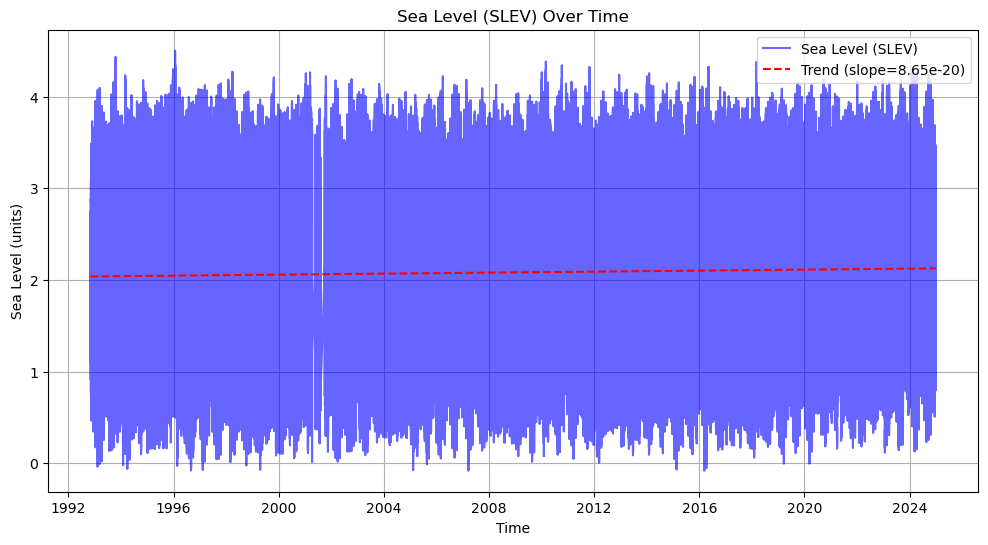

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

time = ds['TIME']
slev = ds['SLEV'].sel(DEPTH=0)

# Convert TIME to numeric (e.g., days since the first observation)
time_numeric = (time - time[0]).astype("timedelta64[D]").astype(float)

# Drop NaN values for regression
valid = ~slev.isnull()
time_numeric_clean = time_numeric[valid]
slev_clean = slev[valid]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(time_numeric_clean, slev_clean)

# Create regression line
regression_line = slope * time_numeric_clean + intercept

# Plot the original data and the regression line
plt.figure(figsize=(12, 6))
plt.plot(time, slev, label="Sea Level (SLEV)", color="blue", alpha=0.6)
plt.plot(time[valid], regression_line, label=f"Trend (slope={slope:.2e})", color="red", linestyle="--")

# Customize the plot
plt.title("Sea Level (SLEV) Over Time")
plt.xlabel("Time")
plt.ylabel("Sea Level (units)")  # Replace "units" with the actual units of SLEV
plt.grid(True)
plt.legend()
plt.show()